In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 653.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 1.8 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2.1 MB/s eta 0:00:02
     -------- ------------------------------- 0.7/3.0 MB 2.4 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 2.5 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 2.7 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 2.7 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 2.8 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/3.0 MB 2.7 MB/s eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Download stock data (e.g., Apple stock - AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Display the first few rows
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348846  6.477045  6.342225  6.451465  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379844  6.291369  6.328684  447610800


In [3]:
# Select the "Close" price
data_close = data[['Close']].values

# Normalize data (LSTMs work better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_close)

# Define training size (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


In [4]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [5]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\aewad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0086 - val_loss: 0.0017
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 4.2906e-04 - val_loss: 7.8991e-04
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 3.6444e-04 - val_loss: 6.8022e-04
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 3.1895e-04 - val_loss: 0.0018
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 3.0812e-04 - val_loss: 0.0017
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 3.3380e-04 - val_loss: 6.2713e-04
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.9367e-04 - val_loss: 0.0016
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.4271e-04 - val_loss: 5.8370e-04
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 3.1518e-04 - val_loss: 6.7987e-04
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.5326e-04 - val_loss: 5.6221e-04
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 2.8322e-04 - val_loss: 0.001

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


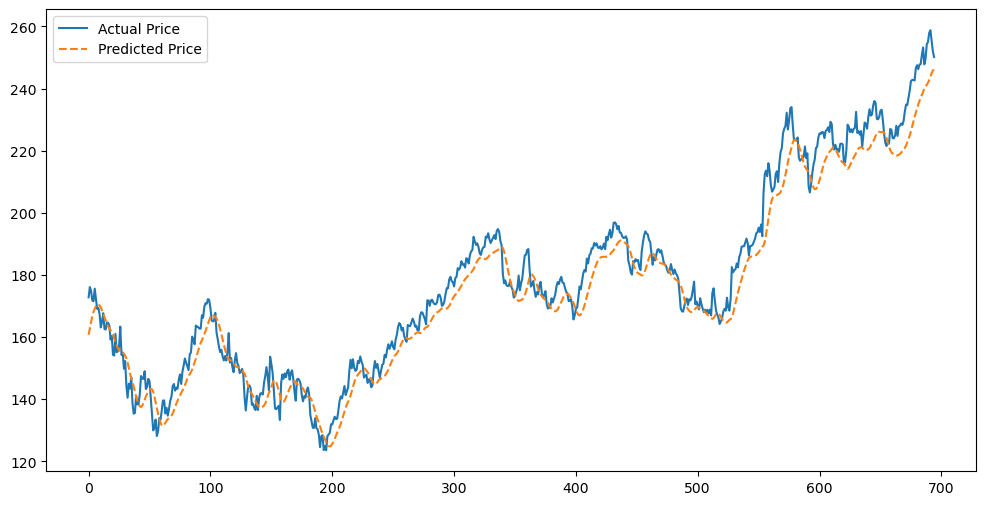

In [6]:
# Predict stock prices
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.show()
